In [18]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltools
from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nltools.stats import isc, fdr, threshold, phase_randomize, circle_shift, _butter_bandpass_filter, _phase_mean_angle, _phase_vector_length
from nilearn.plotting import view_img_on_surf, view_img, plot_surf_roi, plot_glass_brain, plot_stat_map
from scipy.stats import ttest_1samp
from scipy.stats.stats import pearsonr
import itertools
import random
import nibabel as nib

import nilearn.maskers
import datalad.api as dl
import statistics

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import time

/Users/tars/anaconda3/envs/cogneuro/lib/python3.7/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


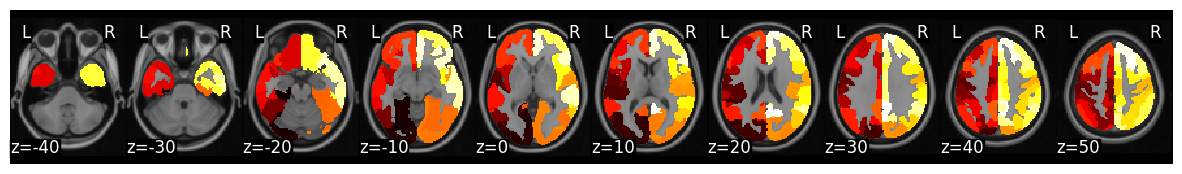

In [2]:
data_dir = '/Users/tars/Desktop/RYU/Sherlock/'

mask = Brain_Data('/Users/tars/Downloads/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii')
mask_x = expand_mask(mask)

mask.plot()

In [3]:
sub_list = [os.path.basename(x).split('_')[0] for x in glob.glob(os.path.join(data_dir, 'fmriprep', '*', 'func', '*Part1*csv'))]
sub_list.sort()

# Whole-brain ISC

## 1. Sherlock

In [4]:
sub_timeseries_sher = {}


for sub in sub_list:
    part1 = pd.read_csv(os.path.join(data_dir, 'fmriprep', sub, 'func', f'{sub}_Part1_Average_ROI_schaefer100.csv'))
    part2 = pd.read_csv(os.path.join(data_dir, 'fmriprep', sub, 'func', f'{sub}_Part2_Average_ROI_schaefer100.csv'))
    sub_data = part1.append(part2)
    sub_data.reset_index(inplace=True, drop=True)
    
    df1=sub_data.iloc[366:370]
    df2=sub_data.iloc[373:376]
    df3=sub_data.iloc[380:381]
    df4=sub_data.iloc[382:383]
    df5=sub_data.iloc[386:389]
    df6=sub_data.iloc[390:393]
    df7=sub_data.iloc[395:396]
    df8=sub_data.iloc[395:397]
    df9=sub_data.iloc[399:401]
    df10=sub_data.iloc[403:405]
    df11=sub_data.iloc[407:409]
    df12=sub_data.iloc[413:417]
    df13=sub_data.iloc[418:419]
    df14=sub_data.iloc[421:423]
    df15=sub_data.iloc[424:425]
    df16=sub_data.iloc[430:432]
    df17=sub_data.iloc[437:438]
    df18=sub_data.iloc[440:444]
    df19=sub_data.iloc[443:445]
    df20=sub_data.iloc[448:453]
    df21=sub_data.iloc[457:464]
    df22=sub_data.iloc[465:471]
    df23=sub_data.iloc[473:475]
    df24=sub_data.iloc[476:477]
    df25=sub_data.iloc[482:489]
    df26=sub_data.iloc[490:491]
    df27=sub_data.iloc[493:495]
    df28=sub_data.iloc[497:501]
    df29=sub_data.iloc[573:575]
    df30=sub_data.iloc[595:599]
    df31=sub_data.iloc[600:603]
    df32=sub_data.iloc[612:613]
    df33=sub_data.iloc[614:615]
    df34=sub_data.iloc[619:624]
    df35=sub_data.iloc[626:629]
    df36=sub_data.iloc[631:634]
    df37=sub_data.iloc[637:638]
    df38=sub_data.iloc[639:647]
    df39=sub_data.iloc[649:650]
    df40=sub_data.iloc[651:653]
    df41=sub_data.iloc[654:658]
    df42=sub_data.iloc[659:663]
    df43=sub_data.iloc[667:676]
    df44=sub_data.iloc[680:681]
    df45=sub_data.iloc[707:708]
    df46=sub_data.iloc[710:712]
    df47=sub_data.iloc[717:719]
    df48=sub_data.iloc[722:729]
    df49=sub_data.iloc[731:737]
    df50=sub_data.iloc[752:757]
    df51=sub_data.iloc[771:774]
    df52=sub_data.iloc[781:786]
    df53=sub_data.iloc[787:788]
    df54=sub_data.iloc[789:791]
    df55=sub_data.iloc[811:814]
    df56=sub_data.iloc[838:839]
    df57=sub_data.iloc[841:843]
    df58=sub_data.iloc[850:851]
    df59=sub_data.iloc[867:870]
    df60=sub_data.iloc[897:899]
    df61=sub_data.iloc[900:905]
    df62=sub_data.iloc[918:922]
    df63=sub_data.iloc[933:934]
    df64=sub_data.iloc[935:936]
    df65=sub_data.iloc[938:939]
    df66=sub_data.iloc[940:947]
    df67=sub_data.iloc[1026:1027]
    df68=sub_data.iloc[1032:1036]
    df69=sub_data.iloc[1039:1041]
    df70=sub_data.iloc[1043:1044]
    df71=sub_data.iloc[1046:1058]
    df72=sub_data.iloc[1059:1069]
    df73=sub_data.iloc[1070:1077]
    df74=sub_data.iloc[1078:1081]
    df75=sub_data.iloc[1085:1091]
    df76=sub_data.iloc[1093:1094]
    df77=sub_data.iloc[1095:1096]
    df78=sub_data.iloc[1097:1098]
    df79=sub_data.iloc[1099:1100]
    df80=sub_data.iloc[1103:1105]
    df81=sub_data.iloc[1111:1114]
    df82=sub_data.iloc[1115:1116]
    df83=sub_data.iloc[1117:1120]
    df84=sub_data.iloc[1127:1129]
    df85=sub_data.iloc[1131:1132]
    df86=sub_data.iloc[1138:1139]
    df87=sub_data.iloc[1141:1147]
    df88=sub_data.iloc[1151:1155]
    df89=sub_data.iloc[1161:1166]
    df90=sub_data.iloc[1168:1171]
    df91=sub_data.iloc[1176:1179]
    df92=sub_data.iloc[1183:1193]
    df93=sub_data.iloc[1195:1198]
    df94=sub_data.iloc[1199:1200]
    df95=sub_data.iloc[1208:1210]
    df96=sub_data.iloc[1211:1213]
    df97=sub_data.iloc[1216:1217]
    df98=sub_data.iloc[1221:1222]
    df99=sub_data.iloc[1223:1225]
    df100=sub_data.iloc[1227:1230]
    df101=sub_data.iloc[1231:1234]
    df102=sub_data.iloc[1235:1238]
    df103=sub_data.iloc[1239:1241]
    df104=sub_data.iloc[1242:1244]
    df105=sub_data.iloc[1245:1249]
    df106=sub_data.iloc[1250:1258]
    df107=sub_data.iloc[1259:1261]
    df108=sub_data.iloc[1262:1267]
    df109=sub_data.iloc[1268:1270]
    df110=sub_data.iloc[1739:1747]
    df111=sub_data.iloc[1749:1756]
    df112=sub_data.iloc[1758:1760]
    df113=sub_data.iloc[1764:1765]
    df114=sub_data.iloc[1767:1769]
    df115=sub_data.iloc[1771:1775]
    df116=sub_data.iloc[1780:1781]
    df117=sub_data.iloc[1783:1790]
    df118=sub_data.iloc[1791:1793]
    df119=sub_data.iloc[1794:1795]
    df120=sub_data.iloc[1799:1800]
    df121=sub_data.iloc[1807:1809]
    df122=sub_data.iloc[1810:1812]
    df123=sub_data.iloc[1811:1812]
    df124=sub_data.iloc[1815:1818]
    df125=sub_data.iloc[1821:1822]
    df126=sub_data.iloc[1823:1827]
    df127=sub_data.iloc[1834:1835]
    df128=sub_data.iloc[1836:1838]
    df129=sub_data.iloc[1839:1842]
    df130=sub_data.iloc[1848:1851]
    df131=sub_data.iloc[1852:1854]
    df132=sub_data.iloc[1856:1857]
    df133=sub_data.iloc[1859:1861]
    df134=sub_data.iloc[1866:1867]
    df135=sub_data.iloc[1868:1874]
    df136=sub_data.iloc[1875:1877]
    df137=sub_data.iloc[1884:1885]
    df138=sub_data.iloc[1887:1893]
    df139=sub_data.iloc[1895:1903]
    df140=sub_data.iloc[1905:1907]
    df141=sub_data.iloc[1909:1910]
    df142=sub_data.iloc[1911:1916]
    df143=sub_data.iloc[1917:1920]
    df144=sub_data.iloc[1923:1925]
    df145=sub_data.iloc[1930:1933]
    df146=sub_data.iloc[1934:1936]
    df147=sub_data.iloc[1944:1951]
    df148=sub_data.iloc[1953:1957]
    df149=sub_data.iloc[1959:1961]
    df150=sub_data.iloc[1962:1964]
    df151=sub_data.iloc[1965:1967]
    df152=sub_data.iloc[1969:1970]
    df153=sub_data.iloc[1971:1972]
    df154=sub_data.iloc[1973:1979]

    
    sub_data_sher = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15,
                     df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28,
                     df29, df30, df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41,
                     df42, df43, df44, df45, df46, df47, df48, df49, df50, df51, df52, df53, df54, 
                     df55, df56, df57, df58, df59, df60, df61, df62, df63, df64, df65, df66, df67, 
                     df68, df69, df70, df71, df72, df73, df74, df75, df76, df77, df78, df79, df80, 
                     df81, df82, df83, df84, df85, df86, df87, df88, df89, df90, df91, df92, df93, 
                     df94, df95, df96, df97, df98, df99, df100, df101, df102, df103, df104, df105, 
                     df106, df107, df108, df109, df110, df111, df112, df113, df114, df115, df116, 
                     df117, df118, df119, df120, df121, df122, df123, df124, df125, df126, df127, 
                     df128, df129, df130, df131, df132, df133, df134, df135, df136, df137, df138, 
                     df139, df140, df141, df142, df143, df144, df145, df146, df147, df148, df149, 

    sub_timeseries_sher[sub] = sub_data_sher

sub_data_sher.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
366,1.981698,1.667572,-1.343154,1.442741,-1.763109,-1.484959,0.245603,0.364050,-5.284776,1.270594,...,-2.030670,-0.252122,-0.642759,-3.430272,-1.737148,-3.807845,-3.605668,-1.982170,-1.892794,-3.955431
367,0.335469,-0.244027,-0.427164,1.409715,-0.964339,-0.636519,1.450074,0.136150,-0.523291,3.659752,...,-2.137385,-0.244869,0.413438,0.352722,-1.227167,-1.965111,-3.553475,-2.962372,-2.811511,-4.379219
368,-1.199459,0.685803,-0.210159,1.591411,0.220461,1.323949,0.158421,-0.066015,1.669887,2.970215,...,-0.864120,1.154363,1.393347,-1.742404,-1.420460,-2.140055,-1.773449,-1.012328,-0.547661,-3.335117
369,-0.349019,-1.761034,0.469275,0.024477,0.799116,2.470999,1.143699,0.486370,2.621545,0.147676,...,-1.211225,-2.205073,-0.537986,-2.628823,-1.408421,-4.773879,-2.884675,-1.895948,0.385716,-2.254331
373,2.044634,-2.355214,-2.031546,-1.965369,-2.840871,-0.760383,0.292577,-1.084156,-2.786329,2.187990,...,-0.351745,-1.608375,-3.191890,-1.266467,0.998298,-1.590792,-1.570860,0.716141,0.543751,-2.035541


In [7]:
roi = 67

def get_subject_roi(sub_data_sher, roi):
    sub_rois_sher = {}
    for sub in sub_data_sher:
        sub_rois_sher[sub] = sub_data_sher[sub].iloc[:, roi]
    return pd.DataFrame(sub_rois_sher)

sub_rois_sher = get_subject_roi(sub_timeseries_sher, roi)
sub_rois_sher.head()

,sub-01,sub-02,sub-03,sub-04,sub-05,sub-06,sub-07,sub-08,sub-09,sub-10,sub-11,sub-12,sub-13,sub-14,sub-15,sub-16
366,1.452665e-12,-0.093049,-2.351503,2.218480,0.760963,-0.817605,-1.269044,-2.283311,1.372572e+00,-1.077959,0.657822,0.511482,-1.483740,1.572292,2.451472,-0.744244
367,-3.388280e-01,0.644294,0.173511,0.171945,2.293609,-1.739279,-0.034931,3.474773,-6.073485e-13,-0.553697,-0.137291,1.315660,-0.242673,4.332380,2.951144,-0.523455
368,1.262980e+00,0.780755,-1.934913,0.264011,0.320187,-0.329144,-1.989504,2.807540,1.866936e-13,-0.391202,1.236301,1.626115,0.405461,3.100836,3.563782,-0.081920
369,6.839237e-01,1.255719,-0.654591,2.977543,2.000493,1.771940,0.433520,-1.163746,3.182637e+00,2.392589,1.049424,3.422785,0.233807,3.519277,2.792438,-0.383463
373,3.040743e-01,-1.882021,-1.845934,-0.632487,-1.202866,1.094395,-0.287821,-5.485163,-3.276984e+00,-0.803414,-0.775001,0.004081,-1.366423,0.070539,3.540678,-0.677498


In [8]:
isc_r_sher, isc_p_sher = {}, {}

for roi in range (100):
    stats = isc(get_subject_roi(sub_timeseries_sher, roi), n_bootstraps=5000, metric='median', method='bootstrap')
    isc_r_sher[roi], isc_p_sher[roi] = stats['isc'], stats['p']

In [9]:
isc_val = pd.DataFrame.from_dict(isc_r_sher, orient = 'index', columns = ['ISC_sher'])
tmp = pd.DataFrame.from_dict(isc_p_sher, orient = 'index', columns = ['p_value'])
tmp.loc[tmp.p_value > .0005, 'p_value'] = 'ns'
isc_val = pd.concat([isc_val,tmp], axis = 1)
isc_val

,ISC_sher_460,p_value
0,0.241611,0.0002
1,0.429063,0.0002
2,0.494594,0.0002
3,0.290308,0.0002
4,0.334269,0.0002
...,...,...
95,0.125524,0.0002
96,0.197907,0.0002
97,0.214455,0.0002
98,0.332619,0.0002


## 2. Mycroft

In [10]:
sub_timeseries_myc = {}

for sub in sub_list:
    part1 = pd.read_csv(os.path.join(data_dir, 'fmriprep', sub, 'func', f'{sub}_Part1_Average_ROI_schaefer100.csv'))
    part2 = pd.read_csv(os.path.join(data_dir, 'fmriprep', sub, 'func', f'{sub}_Part2_Average_ROI_schaefer100.csv'))
    sub_data = part1.append(part2)
    sub_data.reset_index(inplace=True, drop=True)
        
    df1=sub_data.iloc[1481:1484]
    df2=sub_data.iloc[1496:1499]
    df3=sub_data.iloc[1501:1502]
    df4=sub_data.iloc[1503:1511]
    df5=sub_data.iloc[1512:1514]
    df6=sub_data.iloc[1518:1523]
    df7=sub_data.iloc[1526:1529]
    df8=sub_data.iloc[1535:1539]
    df9=sub_data.iloc[1541:1542]
    df10=sub_data.iloc[1548:1550]
    df11=sub_data.iloc[1553:1554]
    df12=sub_data.iloc[1555:1557]
    df13=sub_data.iloc[1563:1565]
    df14=sub_data.iloc[1566:1567]
    df15=sub_data.iloc[1568:1573]
    df16=sub_data.iloc[1574:1577]
    df17=sub_data.iloc[1578:1584]
    df18=sub_data.iloc[1589:1590]
    df19=sub_data.iloc[1591:1593]
    df20=sub_data.iloc[1594:1599]
    df21=sub_data.iloc[1602:1604]
    df22=sub_data.iloc[1605:1609]
    df23=sub_data.iloc[1621:1622]
    df24=sub_data.iloc[1630:1631]
    df25=sub_data.iloc[1643:1645]
    df26=sub_data.iloc[1646:1647]
    df27=sub_data.iloc[1649:1650]
    df28=sub_data.iloc[1654:1657]
    df29=sub_data.iloc[1660:1665]
    df30=sub_data.iloc[1666:1668]


    df= df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12,
                              df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, 
                              df23, df24, df25, df26, df27, df28, df29, df30])

    sub_data_myc = df
    sub_timeseries_myc[sub] = sub_data_myc
        

sub_data_myc.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1481,1.891373,2.858072,-0.485522,1.168508,1.498081,-1.828298,2.802501,1.531278,-0.624921,-1.098173,...,0.080827,0.393045,-2.466403,2.449102,1.694207,2.020326,1.785784,2.518004,0.260847,5.661895
1482,0.812073,2.028865,-0.759167,2.713244,2.382778,-0.298013,2.058670,0.709175,-0.152088,0.342307,...,1.223231,2.882704,-1.794479,-0.674310,0.978493,1.598301,1.335438,1.539329,2.542206,4.807473
1483,1.178804,0.743341,-0.250132,0.735194,0.238519,0.184137,2.090404,0.528695,-0.016786,1.921832,...,0.771648,1.300085,1.164241,2.309085,1.320492,-0.459466,-0.146749,0.449967,0.751289,2.949704
1496,0.736740,-0.153842,-0.315491,-0.117350,-0.130287,0.498537,1.343783,0.131334,0.486599,1.267806,...,1.157177,2.692642,5.308840,0.520401,2.333151,-0.639305,0.384608,0.629467,-0.667494,3.350113
1497,-0.975847,2.212088,-0.257573,1.426336,1.338548,-0.178347,2.542100,-0.668638,1.302713,1.455306,...,0.800860,2.738730,5.654859,1.548947,2.673850,0.885729,2.232414,0.527810,-0.635615,0.168348


In [11]:
len(sub_data_myc)

82

In [12]:
def get_subject_roi_myc(sub_data_myc, roi):
    sub_rois_myc = {}
    for sub in sub_data_myc:
        sub_rois_myc[sub] = sub_data_myc[sub].iloc[:, roi]
    return pd.DataFrame(sub_rois_myc)

sub_rois_myc = get_subject_roi_myc(sub_timeseries_myc, roi)
sub_rois_myc

,sub-01,sub-02,sub-03,sub-04,sub-05,sub-06,sub-07,sub-08,sub-09,sub-10,sub-11,sub-12,sub-13,sub-14,sub-15,sub-16
1481,-4.011031,-4.432718,2.025828,-2.984263,6.564850,-3.988932,0.656800,6.599874,-3.242705e-01,0.589911,3.433031,2.643175,-1.703181,-2.433374,-4.092655,5.661895
1482,-4.898542,-4.099211,2.622365,-1.572601,2.292970,-2.395178,0.861424,5.120206,-1.388754e-01,-0.318661,1.774736,2.641552,-1.290268,-1.656437,-2.801751,4.807473
1483,-6.336595,-1.747035,1.601861,1.542541,3.115807,-1.919259,3.463150,4.044112,1.018870e+00,1.812746,-1.691553,2.403102,-0.791208,-2.060818,-0.781345,2.949704
1496,-0.980965,1.879507,2.584709,-0.239420,0.618793,0.440671,1.076783,2.918588,1.179242e+00,-1.215354,1.824868,1.162743,-3.471286,5.503520,4.466367,3.350113
1497,2.057154,0.449628,3.673843,-2.260351,0.431924,-1.564479,3.180939,2.605982,3.404413e+00,-2.880382,4.551825,0.411148,-2.161840,2.386628,6.667836,0.168348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,-1.971005,1.622141,0.082431,6.134316,1.306826,4.131079,1.623756,1.510114,2.513218e+00,2.179946,1.002997,1.671924,1.719621,2.524872,3.440342,1.859521
1663,1.812897,2.748683,2.403924,5.600870,5.286397,6.491125,0.400631,0.932802,1.159356e-12,0.383667,3.185634,3.221010,0.233885,2.799994,4.024102,3.788786
1664,5.303510,3.745195,2.463850,9.443930,3.839128,6.753870,2.682425,3.618584,4.995035e+00,2.510621,4.050467,3.590200,-3.988069,4.337968,1.706674,2.527272
1666,0.260346,2.609777,0.937317,5.797453,2.241268,1.148682,2.536429,3.341264,-6.123959e-01,-0.309612,1.320295,5.352487,-4.034265,3.925479,0.767779,2.942332


In [13]:
isc_r_myc, isc_p_myc = {}, {}

for roi in range (100):
    stats = isc(get_subject_roi(sub_timeseries_myc, roi), n_bootstraps=5000, metric='median', method='bootstrap')
    isc_r_myc[roi], isc_p_myc[roi] = stats['isc'], stats['p']

In [14]:
isc_val = pd.DataFrame.from_dict(isc_r_myc, orient = 'index', columns = ['ISC_myc_82'])
tmp = pd.DataFrame.from_dict(isc_p_myc, orient = 'index', columns = ['p_value'])
tmp.loc[tmp.p_value > .0005, 'p_value'] = 'ns'
isc_val = pd.concat([isc_val,tmp], axis = 1)
isc_val

,ISC_myc_82,p_value
0,0.134021,ns
1,0.164825,0.0002
2,0.258041,0.0002
3,0.123813,0.0002
4,0.156596,0.0002
...,...,...
95,0.128061,ns
96,0.152116,ns
97,0.104886,ns
98,0.196345,0.0002


# Random sampling 1,000 iterations - Sherlock, Mycroft

In [21]:
per_num = 1000
ran_TR = len(sub_data_myc)

similar = []
different = []

sim_count = []
diff_count = []


for repeat in range (per_num):
    
    ################### Sherlock ###################
    nums = random.sample(range(0,len(sub_data_sher)),ran_TR)
    nums.sort()
    
    sub_timeseries_sher = {}
    for sub in sub_list:
        part1 = pd.read_csv(os.path.join(data_dir, 'fmriprep', sub, 'func', f'{sub}_Part1_Average_ROI_schaefer100.csv'))
        part2 = pd.read_csv(os.path.join(data_dir, 'fmriprep', sub, 'func', f'{sub}_Part2_Average_ROI_schaefer100.csv'))
        sub_data = part1.append(part2)
        sub_data.reset_index(inplace=True, drop=True)

        df1=sub_data.iloc[366:370]
        df2=sub_data.iloc[373:376]
        df3=sub_data.iloc[380:381]
        df4=sub_data.iloc[382:383]
        df5=sub_data.iloc[386:389]
        df6=sub_data.iloc[390:393]
        df7=sub_data.iloc[395:396]
        df8=sub_data.iloc[395:397]
        df9=sub_data.iloc[399:401]
        df10=sub_data.iloc[403:405]
        df11=sub_data.iloc[407:409]
        df12=sub_data.iloc[413:417]
        df13=sub_data.iloc[418:419]
        df14=sub_data.iloc[421:423]
        df15=sub_data.iloc[424:425]
        df16=sub_data.iloc[430:432]
        df17=sub_data.iloc[437:438]
        df18=sub_data.iloc[440:444]
        df19=sub_data.iloc[443:445]
        df20=sub_data.iloc[448:453]
        df21=sub_data.iloc[457:464]
        df22=sub_data.iloc[465:471]
        df23=sub_data.iloc[473:475]
        df24=sub_data.iloc[476:477]
        df25=sub_data.iloc[482:489]
        df26=sub_data.iloc[490:491]
        df27=sub_data.iloc[493:495]
        df28=sub_data.iloc[497:501]
        df29=sub_data.iloc[573:575]
        df30=sub_data.iloc[595:599]
        df31=sub_data.iloc[600:603]
        df32=sub_data.iloc[612:613]
        df33=sub_data.iloc[614:615]
        df34=sub_data.iloc[619:624]
        df35=sub_data.iloc[626:629]
        df36=sub_data.iloc[631:634]
        df37=sub_data.iloc[637:638]
        df38=sub_data.iloc[639:647]
        df39=sub_data.iloc[649:650]
        df40=sub_data.iloc[651:653]
        df41=sub_data.iloc[654:658]
        df42=sub_data.iloc[659:663]
        df43=sub_data.iloc[667:676]
        df44=sub_data.iloc[680:681]
        df45=sub_data.iloc[707:708]
        df46=sub_data.iloc[710:712]
        df47=sub_data.iloc[717:719]
        df48=sub_data.iloc[722:729]
        df49=sub_data.iloc[731:737]
        df50=sub_data.iloc[752:757]
        df51=sub_data.iloc[771:774]
        df52=sub_data.iloc[781:786]
        df53=sub_data.iloc[787:788]
        df54=sub_data.iloc[789:791]
        df55=sub_data.iloc[811:814]
        df56=sub_data.iloc[838:839]
        df57=sub_data.iloc[841:843]
        df58=sub_data.iloc[850:851]
        df59=sub_data.iloc[867:870]
        df60=sub_data.iloc[897:899]
        df61=sub_data.iloc[900:905]
        df62=sub_data.iloc[918:922]
        df63=sub_data.iloc[933:934]
        df64=sub_data.iloc[935:936]
        df65=sub_data.iloc[938:939]
        df66=sub_data.iloc[940:947]
        df67=sub_data.iloc[1026:1027]
        df68=sub_data.iloc[1032:1036]
        df69=sub_data.iloc[1039:1041]
        df70=sub_data.iloc[1043:1044]
        df71=sub_data.iloc[1046:1058]
        df72=sub_data.iloc[1059:1069]
        df73=sub_data.iloc[1070:1077]
        df74=sub_data.iloc[1078:1081]
        df75=sub_data.iloc[1085:1091]
        df76=sub_data.iloc[1093:1094]
        df77=sub_data.iloc[1095:1096]
        df78=sub_data.iloc[1097:1098]
        df79=sub_data.iloc[1099:1100]
        df80=sub_data.iloc[1103:1105]
        df81=sub_data.iloc[1111:1114]
        df82=sub_data.iloc[1115:1116]
        df83=sub_data.iloc[1117:1120]
        df84=sub_data.iloc[1127:1129]
        df85=sub_data.iloc[1131:1132]
        df86=sub_data.iloc[1138:1139]
        df87=sub_data.iloc[1141:1147]
        df88=sub_data.iloc[1151:1155]
        df89=sub_data.iloc[1161:1166]
        df90=sub_data.iloc[1168:1171]
        df91=sub_data.iloc[1176:1179]
        df92=sub_data.iloc[1183:1193]
        df93=sub_data.iloc[1195:1198]
        df94=sub_data.iloc[1199:1200]
        df95=sub_data.iloc[1208:1210]
        df96=sub_data.iloc[1211:1213]
        df97=sub_data.iloc[1216:1217]
        df98=sub_data.iloc[1221:1222]
        df99=sub_data.iloc[1223:1225]
        df100=sub_data.iloc[1227:1230]
        df101=sub_data.iloc[1231:1234]
        df102=sub_data.iloc[1235:1238]
        df103=sub_data.iloc[1239:1241]
        df104=sub_data.iloc[1242:1244]
        df105=sub_data.iloc[1245:1249]
        df106=sub_data.iloc[1250:1258]
        df107=sub_data.iloc[1259:1261]
        df108=sub_data.iloc[1262:1267]
        df109=sub_data.iloc[1268:1270]
        df110=sub_data.iloc[1739:1747]
        df111=sub_data.iloc[1749:1756]
        df112=sub_data.iloc[1758:1760]
        df113=sub_data.iloc[1764:1765]
        df114=sub_data.iloc[1767:1769]
        df115=sub_data.iloc[1771:1775]
        df116=sub_data.iloc[1780:1781]
        df117=sub_data.iloc[1783:1790]
        df118=sub_data.iloc[1791:1793]
        df119=sub_data.iloc[1794:1795]
        df120=sub_data.iloc[1799:1800]
        df121=sub_data.iloc[1807:1809]
        df122=sub_data.iloc[1810:1812]
        df123=sub_data.iloc[1811:1812]
        df124=sub_data.iloc[1815:1818]
        df125=sub_data.iloc[1821:1822]
        df126=sub_data.iloc[1823:1827]
        df127=sub_data.iloc[1834:1835]
        df128=sub_data.iloc[1836:1838]
        df129=sub_data.iloc[1839:1842]
        df130=sub_data.iloc[1848:1851]
        df131=sub_data.iloc[1852:1854]
        df132=sub_data.iloc[1856:1857]
        df133=sub_data.iloc[1859:1861]
        df134=sub_data.iloc[1866:1867]
        df135=sub_data.iloc[1868:1874]
        df136=sub_data.iloc[1875:1877]
        df137=sub_data.iloc[1884:1885]
        df138=sub_data.iloc[1887:1893]
        df139=sub_data.iloc[1895:1903]
        df140=sub_data.iloc[1905:1907]
        df141=sub_data.iloc[1909:1910]
        df142=sub_data.iloc[1911:1916]
        df143=sub_data.iloc[1917:1920]
        df144=sub_data.iloc[1923:1925]
        df145=sub_data.iloc[1930:1933]
        df146=sub_data.iloc[1934:1936]
        df147=sub_data.iloc[1944:1951]
        df148=sub_data.iloc[1953:1957]
        df149=sub_data.iloc[1959:1961]
        df150=sub_data.iloc[1962:1964]
        df151=sub_data.iloc[1965:1967]
        df152=sub_data.iloc[1969:1970]
        df153=sub_data.iloc[1971:1972]
        df154=sub_data.iloc[1973:1979]

        df = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, 
                         df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, 
                         df31, df32, df33, df34, df35, df36, df37, df38, df39, df40, df41, df42, df43, df44, 
                         df45, df46, df47, df48, df49, df50, df51, df52, df53, df54, df55, df56, df57, df58, 
                         df59, df60, df61, df62, df63, df64, df65, df66, df67, df68, df69, df70, df71, df72, 
                         df73, df74, df75, df76, df77, df78, df79, df80, df81, df82, df83, df84, df85, df86, 
                         df87, df88, df89, df90, df91, df92, df93, df94, df95, df96, df97, df98, df99, df100, 
                         df101, df102, df103, df104, df105, df106, df107, df108, df109, df110, df111, df112, 
                         df113, df114, df115, df116, df117, df118, df119, df120, df121, df122, df123, df124, 
                         df125, df126, df127, df128, df129, df130, df131, df132, df133, df134, df135, df136, 
                         df137, df138, df139, df140, df141, df142, df143, df144, df145, df146, df147, df148, 
                         df149, df150, df151, df152, df153, df154])
    
        sub_data_sher=df.iloc[nums]
        sub_timeseries_sher[sub] = sub_data_sher
    print ('dataframe for sherlock is ready...(',len(sub_data_sher),"TRs)")
    
    #################### Mycroft ##################
    
    sub_timeseries_myc = {}
    for sub in sub_list:
        part1 = pd.read_csv(os.path.join(data_dir, 'fmriprep', sub, 'func', f'{sub}_Part1_Average_ROI_schaefer100.csv'))
        part2 = pd.read_csv(os.path.join(data_dir, 'fmriprep', sub, 'func', f'{sub}_Part2_Average_ROI_schaefer100.csv'))
        sub_data = part1.append(part2)
        sub_data.reset_index(inplace=True, drop=True)

        df1=sub_data.iloc[1481:1484]
        df2=sub_data.iloc[1496:1499]
        df3=sub_data.iloc[1501:1502]
        df4=sub_data.iloc[1503:1511]
        df5=sub_data.iloc[1512:1514]
        df6=sub_data.iloc[1518:1523]
        df7=sub_data.iloc[1526:1529]
        df8=sub_data.iloc[1535:1539]
        df9=sub_data.iloc[1541:1542]
        df10=sub_data.iloc[1548:1550]
        df11=sub_data.iloc[1553:1554]
        df12=sub_data.iloc[1555:1557]
        df13=sub_data.iloc[1563:1565]
        df14=sub_data.iloc[1566:1567]
        df15=sub_data.iloc[1568:1573]
        df16=sub_data.iloc[1574:1577]
        df17=sub_data.iloc[1578:1584]
        df18=sub_data.iloc[1589:1590]
        df19=sub_data.iloc[1591:1593]
        df20=sub_data.iloc[1594:1599]
        df21=sub_data.iloc[1602:1604]
        df22=sub_data.iloc[1605:1609]
        df23=sub_data.iloc[1621:1622]
        df24=sub_data.iloc[1630:1631]
        df25=sub_data.iloc[1643:1645]
        df26=sub_data.iloc[1646:1647]
        df27=sub_data.iloc[1649:1650]
        df28=sub_data.iloc[1654:1657]
        df29=sub_data.iloc[1660:1665]
        df30=sub_data.iloc[1666:1668]

        sub_data_myc = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12,
                                  df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, 
                                  df23, df24, df25, df26, df27, df28, df29, df30])
        
        sub_timeseries_myc[sub] = sub_data_myc
        
    print ('dataframe for mycroft is ready...(',len(sub_data_myc),'TRs)')
    
    def get_subject_roi_sher (sub_data_sher, roi):
        sub_rois_sher = {}
        for sub in sub_data_sher:
            sub_rois_sher[sub] = sub_data_sher[sub].iloc[:, roi]
        return pd.DataFrame(sub_rois_sher)

    sub_rois_sher = get_subject_roi_sher(sub_timeseries_sher, roi)

    isc_r_sher, isc_p_sher = {}, {}
    for roi in range(100):
        stats_sher = isc(get_subject_roi_sher(sub_timeseries_sher, roi), n_bootstraps=5000, metric='median', method='bootstrap')
        isc_r_sher[roi], isc_p_sher[roi] = stats_sher['isc'], stats_sher['p']

    isc_r_sher_brain, isc_p_sher_brain = roi_to_brain(pd.Series(isc_r_sher), mask_x), roi_to_brain(pd.Series(isc_p_sher), mask_x)


    def get_subject_roi_myc(sub_data_myc, roi):
        sub_rois_myc = {}
        for sub in sub_data_myc:
            sub_rois_myc[sub] = sub_data_myc[sub].iloc[:, roi]
        return pd.DataFrame(sub_rois_myc)

    sub_rois_myc = get_subject_roi_myc(sub_timeseries_myc, roi)

    isc_r_myc, isc_p_myc = {}, {}
    for roi in range(100):
        stats_myc = isc(get_subject_roi_myc(sub_timeseries_myc, roi), n_bootstraps=5000, metric='median', method='bootstrap')
        isc_r_myc[roi], isc_p_myc[roi] = stats_myc['isc'], stats_myc['p']

    isc_r_myc_brain, isc_p_myc_brain = roi_to_brain(pd.Series(isc_r_myc), mask_x), roi_to_brain(pd.Series(isc_p_myc), mask_x)


    col_name = []
    for i in range(100):
        col_name.append("Sherlock_roi_" + str(i))

    pair_list_sher = [pd.DataFrame()]

    for roi in range(100):

        sub_rois_sher = get_subject_roi_sher(sub_timeseries_sher, roi)
        sub_rois_sher

        correlations = {}
        columns = sub_rois_sher.columns.tolist()

        for col_a, col_b in itertools.combinations(columns, 2):
            correlations[col_a + '__' + col_b] = pearsonr(sub_rois_sher.loc[:, col_a], sub_rois_sher.loc[:, col_b])

        result = pd.DataFrame.from_dict(correlations, orient='index')
        result.columns = ['PCC', 'p-value']
        corr_result = pd.DataFrame.from_dict(correlations, orient='index')

        corr_list = corr_result.iloc[:,0].values.tolist()
        corr_list = pd.DataFrame.from_dict(corr_list)
        pair_list_sher.append(corr_list)


    pair_list_sher = pd.concat(pair_list_sher, axis = 1)
    pair_list_sher.columns = col_name
    pair_list_sher.fillna(0, inplace=True)


    col_name = []
    for i in range(100):
        col_name.append("Mycroft_roi_" + str(i))

    pair_list_myc = [pd.DataFrame()]

    for roi in range(100):

        sub_rois_myc = get_subject_roi_myc(sub_timeseries_myc, roi)

        correlations = {}
        columns = sub_rois_myc.columns.tolist()

        for col_a, col_b in itertools.combinations(columns, 2):
            correlations[col_a + '__' + col_b] = pearsonr(sub_rois_myc.loc[:, col_a], sub_rois_myc.loc[:, col_b])

        result = pd.DataFrame.from_dict(correlations, orient='index')
        result.columns = ['PCC', 'p-value']

        corr_result = pd.DataFrame.from_dict(correlations, orient='index')
        
        corr_list = corr_result.iloc[:,0].values.tolist()
        corr_list = pd.DataFrame.from_dict(corr_list)
        pair_list_myc.append(corr_list)

    pair_list_myc = pd.concat(pair_list_myc, axis = 1)
    pair_list_myc.columns = col_name
    pair_list_myc.fillna(0, inplace=True)

    for roi in range (100):

        sher = np.arctanh(pair_list_sher.iloc[:,roi])
        myc = np.arctanh(pair_list_myc.iloc[:,roi])

        t_test = scipy.stats.ttest_rel(sher,myc)

        if t_test[1] < 0.0005:
            different.append(str(roi))
        else:
            similar.append(str(roi))


diff_list = []
for roi in range (100):
    tmp = different.count(str(roi))
    diff_list.append(tmp)

sim_list = []
for roi in range (100):
    tmp = similar.count(str(roi))
    sim_list.append(tmp)

sim_count = pd.DataFrame(sim_list, columns=['Not Different'])
diff_count = pd.DataFrame(diff_list, columns = ['Different'])
                       
per_count = pd.concat([sim_count, diff_count],axis=1)
print(per_count)

dataframe for sherlock is ready...( 82 TRs)
dataframe for mycroft is ready...( 82 TRs)


/Users/tars/anaconda3/envs/cogneuro/lib/python3.7/site-packages/nilearn/__init__.py:67: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/Users/tars/anaconda3/envs/cogneuro/lib/python3.7/site-packages/nilearn/__init__.py:67: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/Users/tars/anaconda3/envs/cogneuro/lib/python3.7/site-packages/nilearn/__init__.py:67: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
/Users/tars/anaconda3/envs/cogneuro/lib/python3.7/site-packages/nilearn/__init__.py:67: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.1

KeyboardInterrupt: 